# Applying Hybrid Monte-Carlo (HMC) to the long range Ising model
A Hybrid Monte-Carlo algorithm is used to study the dynamics of a long range 2d spin lattice and compared with analytically obtained results. Also a leap-frog integration is implemented in the process of the HMC algorithm. Bootstrap methods are used for error analysis of computed observables. 

## Theory
*The expectation value of some operator $O$ is given by
$$\langle O \rangle = \frac{1}{Z}\int \text{d}\phi O[\phi]e^{-S[\phi]}$$ Use the expression above and the fact that the mean magnetization (per site) and energy (per
site) are given by $$\langle m\rangle=\frac{T}{N}\frac{\partial\log Z}{\partial h },$$
$$\langle \varepsilon\rangle-\frac{1}{N}\frac{\partial\log Z}{\partial \beta }$$
to derive corresponding expressions for $O[\phi]$ for these quantities.*

Doing the math yields:
$$m[\phi]=\frac{1}{\sqrt{2\pi\beta J}}\tanh{(\beta h \pm \phi)}$$
$$\varepsilon[\phi]=-\frac{1}{\sqrt{2\pi\beta J}N}\left(\frac{\phi^2}{2\beta^2J}+h\cdot\tanh(\beta h \pm \phi)\right)$$

We encounter the following artificial Hamiltonian in the process of the HMC algorithm:

$$\mathcal{H}=\frac{p^2}{2}+\frac{\phi^2}{2\beta J}-N\log(2\cosh(\beta h + \phi))$$

*Determine the equations of motion (EoMs) for this Hamiltonian by applying the
Hamilton equations*

$$\dot{p}=-\frac{\partial\mathcal{H}}{\partial\phi}=-\left(\frac{\phi}{\beta J}-N\cdot\tanh(\beta h + \phi)\right)$$
$$\dot{\phi}=\frac{\partial\mathcal{H}}{\partial p}=p$$


## Aim of the code
blabla
### Numerical approach
bla
### Analytical approach
bla

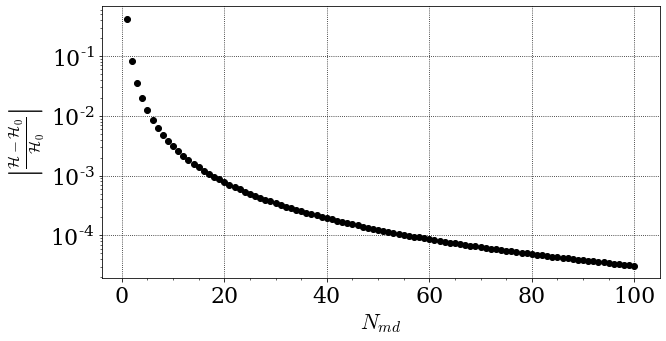

In [16]:
import numpy as np
import matplotlib.pyplot as plt
T=1
beta=1/T
J=1
N_sites=8
h=1
#pretty plots
def beauty_plot():
    plt.figure(figsize=(10,5))
    plt.minorticks_on()
    plt.rcParams["mathtext.fontset"]="cm"
    plt.rcParams['errorbar.capsize'] = 3
    plt.rcParams['mathtext.rm'] = 'serif'
    font={'family' : 'serif','size'   : 22}
    plt.rc("font",**font)
    plt.xticks(fontsize=22,fontname='DejaVu Serif')
    plt.yticks(fontsize=22,fontname='DejaVu Serif')
    plt.grid(color='black',linestyle=':')



def leap_frog(N,p0,phi0):
    eps=1/N
    p, phi = p0, phi0
    #first leap-frog step
    phi = phi+eps/2*p
    #leap-frog
    for i in range(0,N-1):
        p=p-eps*(phi/(beta*J)-N_sites*np.tanh(beta*h+phi))
        phi=phi+eps*p
    #last step of leap-frog
    p=p-eps*(phi/(beta*J)-N_sites*np.tanh(beta*h+phi))
    phi=phi+eps/2*p
    return p, phi
def art_hamiltonian(p,phi,J,N_sites):
    return p**2/2+phi**2/(2*beta*J)-N_sites*np.log(2*np.cosh(beta*h+phi))

p_0=1
phi_0=1
hamiltonian_0=art_hamiltonian(p_0,phi_0,J,N_sites)
hamiltonian=[]
for i in range(1,101):
    p, phi = leap_frog(i,p_0,phi_0)
    hamiltonian.append(np.abs((art_hamiltonian(p,phi,J,N_sites)-hamiltonian_0)/hamiltonian_0))
beauty_plot()
plt.plot(np.linspace(1,100,100),hamiltonian,'o',c="black")    
plt.yscale("log")    
plt.xlabel("$N_{md}$")
plt.ylabel("$\\left|\\frac{\\mathcal{H}-\\mathcal{H}_0}{\\mathcal{H}_0}\\right|$")
plt.show()